In [106]:
import numpy as np
import torch
import torch.optim as optim
import gym
import matplotlib.pyplot as plt


import site
site.addsitedir('../src/')

from backpropamine_A2C import BP_RNetwork, Standard_RNetwork, Standard_FFNetwork
from BP_A2C.BP_A2C_agent import evaluate_BP_agent_pole_length, evaluate_BP_agent_force_mag, evaluate_BP_agent_pole_mass

%matplotlib inline

In [107]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dtype = torch.float

In [108]:
# Environment specific parameters
env_name = 'CartPole-v0'
max_reward = 200
max_steps = 200

n_evaluations = 100

In [109]:
evaluation_seeds = np.load('rstdp_cartpole_stuff/seeds/evaluation_seeds.npy')

In [100]:
# Load pre-trained model weights
weights_0 = torch.load('BP_A2C/training_results/FIRST5_a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_0.pt', map_location=torch.device(device))
weights_1 = torch.load('BP_A2C/training_results/FIRST5_a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_1.pt', map_location=torch.device(device))
weights_2 = torch.load('BP_A2C/training_results/FIRST5_a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_2.pt', map_location=torch.device(device))
weights_3 = torch.load('BP_A2C/training_results/FIRST5_a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_3.pt', map_location=torch.device(device))
weights_4 = torch.load('BP_A2C/training_results/FIRST5_a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_4.pt', map_location=torch.device(device))
weights_5 = torch.load('BP_A2C/training_results/OTHER5_a2c_result_13_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_0.pt', map_location=torch.device(device))
weights_6 = torch.load('BP_A2C/training_results/OTHER5_a2c_result_13_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_1.pt', map_location=torch.device(device))
weights_7 = torch.load('BP_A2C/training_results/OTHER5_a2c_result_13_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_2.pt', map_location=torch.device(device))
weights_8 = torch.load('BP_A2C/training_results/OTHER5_a2c_result_13_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_3.pt', map_location=torch.device(device))
weights_9 = torch.load('BP_A2C/training_results/OTHER5_a2c_result_13_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_4.pt', map_location=torch.device(device))
weights = [weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, weights_7, weights_8, weights_9]


In [89]:
weights_0 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_0.pt', map_location=torch.device(device))
weights_1 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_1.pt', map_location=torch.device(device))
weights_2 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_2.pt', map_location=torch.device(device))
weights_3 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_3.pt', map_location=torch.device(device))
weights_4 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_4.pt', map_location=torch.device(device))
weights_5 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_5.pt', map_location=torch.device(device))
weights_6 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_6.pt', map_location=torch.device(device))
weights_7 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_7.pt', map_location=torch.device(device))
weights_8 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_8.pt', map_location=torch.device(device))
weights_9 = torch.load('BP_A2C/training_results/a2c_result_4_20231016_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_Standard_A2C_9.pt', map_location=torch.device(device))
weights = [weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, weights_7, weights_8, weights_9]

In [116]:
weights_0 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_0.pt', map_location=torch.device(device))
weights_1 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_1.pt', map_location=torch.device(device))
weights_2 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_2.pt', map_location=torch.device(device))
weights_3 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_3.pt', map_location=torch.device(device))
weights_4 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_4.pt', map_location=torch.device(device))
weights_5 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_5.pt', map_location=torch.device(device))
weights_6 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_6.pt', map_location=torch.device(device))
weights_7 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_7.pt', map_location=torch.device(device))
weights_8 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_8.pt', map_location=torch.device(device))
weights_9 = torch.load('BP_A2C/training_results/Standard_FFNN_a2c_result_5_20231019_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_2000_selectionmethod_evaluation/checkpoint_StandardFFNN_A2C_9.pt', map_location=torch.device(device))
weights = [weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, weights_7, weights_8, weights_9]

In [110]:
weights_0 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_0.pt', map_location=torch.device(device))
weights_1 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_1.pt', map_location=torch.device(device))
weights_2 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_2.pt', map_location=torch.device(device))
weights_3 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_3.pt', map_location=torch.device(device))
weights_4 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_4.pt', map_location=torch.device(device))
weights_5 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_5.pt', map_location=torch.device(device))
weights_6 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_6.pt', map_location=torch.device(device))
weights_7 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_7.pt', map_location=torch.device(device))
weights_8 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_8.pt', map_location=torch.device(device))
weights_9 = torch.load('BP_A2C/training_results/BP_RNN_a2c_result_20_20231025_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_8000_selectionmethod_evaluation_trainingmethod_range_rangemin_0.7_rangemax_9.0/checkpoint_BP_A2C_9.pt', map_location=torch.device(device))
weights = [weights_0, weights_1, weights_2, weights_3, weights_4, weights_5, weights_6, weights_7, weights_8, weights_9]

In [104]:
# Helper for printing
eraser = '\b \b'

### Evaluate pre-trained BP models on original environment

In [111]:
original_eval_rewards = []

for i, w in enumerate(weights):
    print('Run {:02d} ...'.format(i), end='')
    agent_net = BP_RNetwork(4, 64, 2, 5).to(device)
    agent_net.loadWeights(w)

    rewards = evaluate_BP_agent_pole_length(agent_net, env_name, n_evaluations, evaluation_seeds, 1.0)
    original_eval_rewards.append(rewards)
    
    print(eraser*3 + '-> Avg reward: {:7.2f}'.format(np.mean(rewards)))

print(f"Mean avg reward: {np.mean(original_eval_rewards)}")

Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Run 05 -> Avg reward:  200.00
Run 06 -> Avg reward:  200.00
Run 07 -> Avg reward:  200.00
Run 08 -> Avg reward:  200.00
Run 09 -> Avg reward:  200.00
Mean avg reward: 200.0


### Evaluate pre-trained BP models on modified environments

In [112]:
percentages = np.linspace(0.1, 2.0, 20)
percentages = np.concatenate((percentages, np.linspace(2.5, 20, 36)))
all_modified_env_eval_rewards = []
for percentage in percentages:
    print(percentage)
    modified_env_eval_rewards = []

    for i, w in enumerate(weights):
        print('Run {:02d} ...'.format(i), end='')
        policy_net = BP_RNetwork(4, 64, 2, 5).to(device)
        policy_net.loadWeights(w)

        rewards = evaluate_BP_agent_pole_length(policy_net, env_name, n_evaluations, evaluation_seeds, percentage)
        modified_env_eval_rewards.append(rewards)
        
        print(eraser*3 + '-> Avg reward: {:7.2f}'.format(np.mean(rewards)))

    all_modified_env_eval_rewards.append(modified_env_eval_rewards)


0.1
Run 00 -> Avg reward:   31.89
Run 01 -> Avg reward:   38.55
Run 02 -> Avg reward:   43.75
Run 03 -> Avg reward:   37.86
Run 04 -> Avg reward:   57.17
Run 05 -> Avg reward:   38.07
Run 06 -> Avg reward:   77.98
Run 07 -> Avg reward:   22.36
Run 08 -> Avg reward:  100.75
Run 09 -> Avg reward:   43.48
0.2
Run 00 -> Avg reward:   79.04
Run 01 -> Avg reward:  119.83
Run 02 -> Avg reward:  135.44
Run 03 -> Avg reward:  104.71
Run 04 -> Avg reward:  184.97
Run 05 -> Avg reward:  119.02
Run 06 -> Avg reward:  150.68
Run 07 -> Avg reward:   58.02
Run 08 -> Avg reward:  169.04
Run 09 -> Avg reward:  129.99
0.3
Run 00 -> Avg reward:  137.61
Run 01 -> Avg reward:  172.08
Run 02 -> Avg reward:  180.50
Run 03 -> Avg reward:  173.47
Run 04 -> Avg reward:  199.32
Run 05 -> Avg reward:  153.40
Run 06 -> Avg reward:  181.94
Run 07 -> Avg reward:  111.03
Run 08 -> Avg reward:  184.95
Run 09 -> Avg reward:  173.00
0.4
Run 00 -> Avg reward:  178.63
Run 01 -> Avg reward:  197.48
Run 02 -> Avg reward:  1

In [104]:
mean_avgs = []
std_dev_avgs = []
median_avgs = []
for results in all_modified_env_eval_rewards:
    means_per_model = np.mean(results, axis = 1) # 10 evaluation means (one per model) for one environment
    mean_avgs.append(np.mean(means_per_model)) # 1 mean of evaluation means for one environment
    std_dev_avgs.append(np.std(means_per_model)) # 1 stddev of evaluation means for one environment
    median_avgs.append(np.median(means_per_model)) # 1 median of evaluation means for one environment

In [105]:
means_old = np.load("BP_A2C/evaluation_results/BP_A2C_RNN_10models/force_mag_backup/means.npy")
stds_old = np.load("BP_A2C/evaluation_results/BP_A2C_RNN_10models/force_mag_backup/stddevs.npy")
percentages_old = np.load("BP_A2C/evaluation_results/BP_A2C_RNN_10models/force_mag_backup/percentages.npy")
medians_old = np.load("BP_A2C/evaluation_results/BP_A2C_RNN_10models/force_mag_backup/medians.npy")

mean_avgs = np.concatenate((mean_avgs, means_old))
std_dev_avgs = np.concatenate((std_dev_avgs, stds_old))
percentages = np.concatenate((percentages, percentages_old))
median_avgs = np.concatenate((median_avgs, medians_old))

In [113]:
mean_avgs = []
std_dev_avgs = []
median_avgs = []
for results in all_modified_env_eval_rewards:
    means_per_model = np.mean(results, axis = 1) # 10 evaluation means (one per model) for one environment
    mean_avgs.append(np.mean(means_per_model)) # 1 mean of evaluation means for one environment
    std_dev_avgs.append(np.std(means_per_model)) # 1 stddev of evaluation means for one environment
    median_avgs.append(np.median(means_per_model)) # 1 median of evaluation means for one environment
    
    

np.save("BP_A2C/evaluation_results/BP_A2C_RNN_range0.79.0_10models/pole_length/means.npy", mean_avgs)
np.save("BP_A2C/evaluation_results/BP_A2C_RNN_range0.79.0_10models/pole_length/stddevs.npy", std_dev_avgs)
np.save("BP_A2C/evaluation_results/BP_A2C_RNN_range0.79.0_10models/pole_length/percentages.npy", percentages)
np.save("BP_A2C/evaluation_results/BP_A2C_RNN_range0.79.0_10models/pole_length/medians.npy", median_avgs)

Text(0.5, 1.0, 'Average reward (over 100 episodes and 10 models) BP A2C RNN')

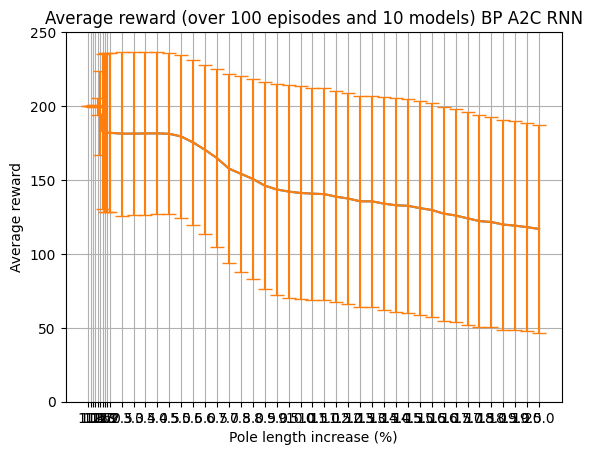

In [56]:
fig = plt.figure()
plt.plot(percentages, mean_avgs)
plt.errorbar(percentages, mean_avgs, std_dev_avgs, capsize=5)
plt.ylim(0, 250)
plt.grid(True)
plt.xlabel("Pole length increase (%)")
plt.xticks(percentages)
plt.ylabel("Average reward")
plt.title("Average reward (over 100 episodes and 10 models) BP A2C RNN")
# plt.savefig("figs/BP_A2C_RNN_5models_evaluation.png", dpi=300)